# 1. Overview dataset

In [28]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel(r"C:\Users\alexs\Documents\TFM_MBD\TFM_MBD_2024_AlexSerra\data\Times_Series_Project_uoc.xlsx")

In [3]:
df.head()

,date,sales_region1,sales_region2,sales_region3,humidity_avg_Basel,humidity_avg_Bellinzona,humidity_avg_Bern,humidity_avg_Chur,humidity_avg_Distretto di Lugano,humidity_avg_Geneva,...,gtrends_CH-VS_pollen allergie,gtrends_CH-ZH_heuschnupfen,gtrends_CH-ZH_pollen,gtrends_CH-ZH_pollen allergie,influenza,pollution_Zurich_no2,pollution_Zurich_o3,pollution_Zurich_pm10,pollution_Zurich_pm25,pollution_Zurich_so2
0,2020-01-06,0.680314,1.144905,1.680806,85.688095,80.119048,92.354497,65.678571,76.190476,83.732143,...,0,0,0,0,221.0,13.942857,5.657143,15.428571,3.000000,0.500000
1,2020-01-13,1.469124,1.033474,1.395917,83.095714,80.625000,84.059524,58.386905,77.696429,80.839286,...,0,0,0,0,3.0,16.328571,5.485714,12.285714,3.714286,0.885714
2,2020-01-20,0.948362,1.026370,2.199281,78.803810,68.232143,81.423077,68.261905,67.952381,74.791667,...,0,0,0,0,530.5,14.828571,11.000000,10.714286,2.571429,0.914286
3,2020-01-27,0.885640,1.034298,1.648535,84.359601,76.678830,89.023810,61.957557,73.318723,87.666149,...,0,0,0,0,911.5,18.314286,2.685714,24.142857,5.000000,0.785714
4,2020-02-03,1.686237,0.525493,1.296067,79.455952,81.726449,78.101967,77.494565,79.429654,83.072981,...,0,0,0,0,772.0,6.985714,20.357143,6.428571,1.285714,0.371429


In [4]:
df.shape

(183, 66)

In [5]:
df.columns

Index(['date', 'sales_region1', 'sales_region2', 'sales_region3',
       'humidity_avg_Basel', 'humidity_avg_Bellinzona', 'humidity_avg_Bern',
       'humidity_avg_Chur', 'humidity_avg_Distretto di Lugano',
       'humidity_avg_Geneva', 'humidity_avg_Lausanne', 'humidity_avg_Sion',
       'humidity_avg_Zurich', 'temp_avg_k_Basel', 'temp_avg_k_Bellinzona',
       'temp_avg_k_Bern', 'temp_avg_k_Chur', 'temp_avg_k_Distretto di Lugano',
       'temp_avg_k_Geneva', 'temp_avg_k_Lausanne', 'temp_avg_k_Sion',
       'temp_avg_k_Zurich', 'gtrends_CH_allergie',
       'gtrends_CH_pollen allergie', 'gtrends_CH-BE_allergie',
       'gtrends_CH-BE_heuschnupfen', 'gtrends_CH-BE_pollen',
       'gtrends_CH-BE_pollen allergie', 'gtrends_CH-BS_heuschnupfen',
       'gtrends_CH-BS_pollen', 'gtrends_CH-FR_allergie',
       'gtrends_CH-FR_heuschnupfen', 'gtrends_CH-GR_allergie',
       'gtrends_CH-GR_heuschnupfen', 'gtrends_CH-GR_pollen',
       'gtrends_CH-LU_allergie', 'gtrends_CH-LU_heuschnupfen',
    

# 2. Creating function that preprocess dataframe

- Keep date
- Sum Sales
- Average humidity
- Average temp
- Sum all values of same gtrends (but different locations)
- Keep same values of every polution and influenza

In [6]:
def pre_general_agg(df):
    
    df_clean=pd.DataFrame()
    
    df_clean["ds"]=df["date"]
    
    l_sales = [col for col in df.columns if "sales" in col]
    df_clean["y"]=df[l_sales].sum(axis=1)
    
    l_humidity = [col for col in df.columns if "humidity" in col]
    df_clean["humidity"]=df[l_humidity].mean(axis=1)
    
    l_temp = [col for col in df.columns if "temp" in col]
    df_clean["temp"]=df[l_temp].mean(axis=1)
    
    return(df_clean)

    

In [7]:
def pre_gtrends(df, df_clean):
    
    gtrends_columns = [col for col in df.columns if 'gtrends' in col]
    gtrend_unique_col=[]
    for e in gtrends_columns:
        val=e.split("_")[2]
        if val=="allergie":
            val="_"+val
        if val not in gtrend_unique_col:
            l=[col for col in df.columns if val in col]
            df_clean["gtrends_"+val]=df[l].sum(axis=1)
    
    return (df_clean)

In [8]:
def pre_others(df, df_clean):
    
    exclude=["date", "sales", "humidity", "temp", "gtrends"]
    unique_col=[col for col in df.columns if not any(keyword in col.lower() for keyword in exclude)]
    for e in unique_col:
        df_clean[e]=df[e]
    
    df_clean.rename(columns={'gtrends__allergie': "gtrends_allergie"}, inplace=True)
    
    return(df_clean)
    

In [9]:
def preprocessing(df):
    
    df_1 = pre_general_agg(df)
    
    df_2 = pre_gtrends(df, df_1)
    
    df_3 = pre_others(df, df_2)
    
    return df_3    

In [10]:
df_clean= preprocessing(df)

In [11]:
df_clean.head(5)

,ds,y,humidity,temp,gtrends_allergie,gtrends_pollen allergie,gtrends_heuschnupfen,gtrends_pollen,influenza,pollution_Zurich_no2,pollution_Zurich_o3,pollution_Zurich_pm10,pollution_Zurich_pm25,pollution_Zurich_so2
0,2020-01-06,3.506025,81.875606,274.946388,115,0,8,22,221.0,13.942857,5.657143,15.428571,3.000000,0.500000
1,2020-01-13,3.898515,77.805608,275.982323,176,0,36,39,3.0,16.328571,5.485714,12.285714,3.714286,0.885714
2,2020-01-20,4.174013,73.820989,275.575986,140,0,5,27,530.5,14.828571,11.000000,10.714286,2.571429,0.914286
3,2020-01-27,3.568473,80.112456,274.589907,150,0,5,83,911.5,18.314286,2.685714,24.142857,5.000000,0.785714
4,2020-02-03,3.507797,79.792778,279.608504,98,0,32,10,772.0,6.985714,20.357143,6.428571,1.285714,0.371429


# 3. Train and Test

In [12]:
df_clean.shape[0]

183

In [13]:
train_lim = int(df_clean.shape[0]*0.7)
df_train = df_clean.iloc[:train_lim]
df_test = df_clean.iloc[train_lim:]

# 4. Prophet

In [14]:
from prophet import Prophet

In [15]:
model = Prophet()

In [16]:
model.fit(df_train)

11:08:43 - cmdstanpy - INFO - Chain [1] start processing
11:08:43 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
forecast = model.predict(df_test[["ds"]])

In [22]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-06-20,3.299308,1.905773,3.373709,3.299294,3.299320,-0.665606,-0.665606,-0.665606,-0.665606,-0.665606,-0.665606,0.0,0.0,0.0,2.633702
1,2022-06-27,3.307058,1.904784,3.404851,3.306827,3.307281,-0.650269,-0.650269,-0.650269,-0.650269,-0.650269,-0.650269,0.0,0.0,0.0,2.656789
2,2022-07-04,3.314807,1.941284,3.484492,3.314239,3.315338,-0.609714,-0.609714,-0.609714,-0.609714,-0.609714,-0.609714,0.0,0.0,0.0,2.705094
3,2022-07-11,3.322557,1.851186,3.424449,3.321647,3.323547,-0.636839,-0.636839,-0.636839,-0.636839,-0.636839,-0.636839,0.0,0.0,0.0,2.685718
4,2022-07-18,3.330307,1.846352,3.333940,3.328955,3.331849,-0.757972,-0.757972,-0.757972,-0.757972,-0.757972,-0.757972,0.0,0.0,0.0,2.572335
5,2022-07-25,3.338057,1.745836,3.229033,3.335952,3.340195,-0.897007,-0.897007,-0.897007,-0.897007,-0.897007,-0.897007,0.0,0.0,0.0,2.441050
6,2022-08-01,3.345806,1.642770,3.122778,3.343061,3.348576,-0.948268,-0.948268,-0.948268,-0.948268,-0.948268,-0.948268,0.0,0.0,0.0,2.397538
7,2022-08-08,3.353556,1.687963,3.196254,3.349990,3.356956,-0.867673,-0.867673,-0.867673,-0.867673,-0.867673,-0.867673,0.0,0.0,0.0,2.485884
8,2022-08-15,3.361306,1.946406,3.441906,3.356861,3.365303,-0.685006,-0.685006,-0.685006,-0.685006,-0.685006,-0.685006,0.0,0.0,0.0,2.676300
9,2022-08-22,3.369056,2.112623,3.646793,3.363636,3.373764,-0.444205,-0.444205,-0.444205,-0.444205,-0.444205,-0.444205,0.0,0.0,0.0,2.924850


In [23]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [29]:
mape=calculate_mape(df_test["y"],forecast["yhat"] )

In [30]:
print(f'MAPE: {mape:.2f}%')

MAPE: 21.12%


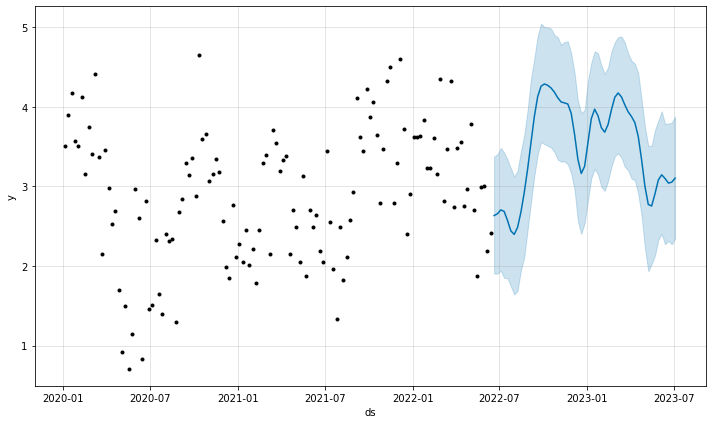

In [48]:
fig1 = model.plot(forecast)

## 5. Prophet adding regressors

In [31]:
model_multiva = Prophet()

In [34]:
for e in df_train.columns[2:]:
    model_multiva.add_regressor(e)

In [36]:
model_multiva.fit(df_train)

11:16:47 - cmdstanpy - INFO - Chain [1] start processing
11:16:47 - cmdstanpy - INFO - Chain [1] done processing


In [44]:
forecast_multiva = model_multiva.predict(df_test.drop(columns="y"))

In [45]:
mape=calculate_mape(df_test["y"],forecast_multiva["yhat"] )

print(f'MAPE: {mape:.2f}%')

MAPE: 21.86%


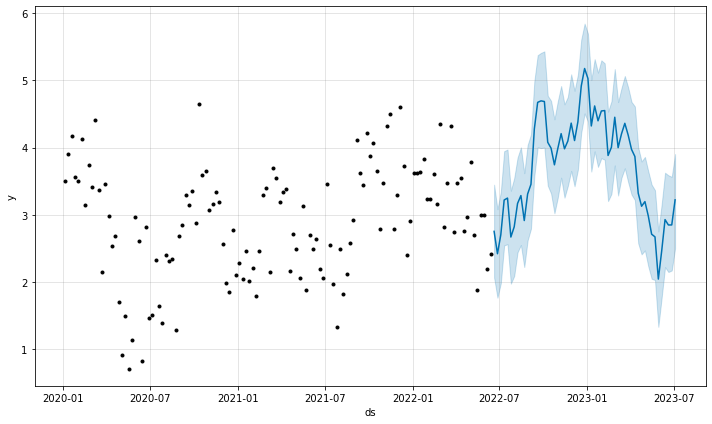

In [47]:
fig1 = model_multiva.plot(forecast_multiva)

# 6. AutoArima

In [52]:
from pmdarima import auto_arima

In [54]:
df_arima = df_clean.copy()

In [55]:
df_arima.set_index('ds', inplace=True)

In [59]:
df_arima = df_arima[["y"]]

In [60]:
df_arima

,y
ds,
2020-01-06,3.506025
2020-01-13,3.898515
2020-01-20,4.174013
2020-01-27,3.568473
2020-02-03,3.507797
...,...
2023-06-05,2.316237
2023-06-12,2.038207
2023-06-19,2.551148


In [61]:
train_lim = int(df_clean.shape[0]*0.7)
df_train_arima = df_arima.iloc[:train_lim]
df_test_arima = df_arima.iloc[train_lim:]

In [75]:
# Train AutoARIMA model
model_autoarima = auto_arima(df_train_arima, 
                   seasonal=True,  # Change to True if you want to fit a seasonal ARIMA

                   stepwise=True,   # Set to False to perform a more exhaustive search
                   trace=True)      # Set to True to see the search progress

# Print the best model parameters
print(model_autoarima.summary())


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=268.565, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=325.069, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=278.007, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=292.544, Time=0.03 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=646.754, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=267.768, Time=0.08 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=290.754, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=265.856, Time=0.06 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=267.825, Time=0.15 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=274.014, Time=0.10 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=272.651, Time=0.04 sec

Best model:  ARIMA(1,0,1)(0,0,0)[0] intercept
Total fit time: 0.719 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  128
Model: 

In [76]:
forecast_autoarima = model_autoarima.predict(n_periods=df_test_arima.shape[0])

In [77]:
mape=calculate_mape(df_test_arima["y"],forecast_autoarima.values )

print(f'MAPE: {mape:.2f}%')

MAPE: 21.07%
